데이터 다운로드: https://drive.google.com/file/d/1Rj_cwZpES1AdMkWabr4XFY8p7hBHsgLO/view?usp=sharing

원본 출처:
https://www.kaggle.com/competitions/expedia-hotel-recommendations

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("hotel_booking.zip")
df.head(2)

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 08:22:12          2               3                     66   
1  2014-02-27 18:01:32          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   318               52078                        NaN   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0           1   
1      756          0           1  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0                8250                         1           1    1   
1                8291                         1           1    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           191              2  

[2 rows x 24 columns]

### Q01. 데이터의 row 개수와 column 개수를 확인하시오.

In [4]:
df.shape

(2428680, 24)

In [5]:
len(df)

2428680

### Q02. 각 변수별 결측치 개수를 확인하시오.

In [ ]:
# .isna() .isnull(), .notna(), .notnull(), .fillna(), .dropna()

In [6]:
df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    855940
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                        2500
srch_co                        2501
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

### Q03. 데이터는 총 몇 개 사이트에서 수집이 되었는가?
※ site_name 변수를 참고하시오.

In [8]:
df["site_name"].unique()

array([ 2, 30, 37, 24, 25, 13, 33, 11, 34, 26,  8, 28, 22, 17, 44, 27, 32,
       29,  7, 40, 14, 23,  9, 15, 18, 16, 19, 35, 21, 36, 46, 31, 10, 53,
        6, 45, 48, 38, 43, 20, 41, 47], dtype=int64)

In [9]:
# len(df["site_name"].unique())
df["site_name"].nunique()

42

### Q04. 가장 많은 데이터가 수집된 사이트 번호는 무엇인가?

In [11]:
df["site_name"].value_counts()

2     1540102
24     181009
11     173740
34     144631
37      95450
8       55599
13      46555
23      45496
17      19377
28      14658
25      13076
30      11922
18      11916
26      11715
33       9688
22       6817
10       6383
27       5661
15       5291
35       5089
32       3180
29       2885
36       2528
40       1915
46       1891
7        1802
20       1686
9        1544
14       1391
31       1078
48        834
6         779
21        745
19        507
53        441
16        387
38        299
43        205
45        174
44        144
47         50
41         40
Name: site_name, dtype: int64

In [12]:
df["site_name"].value_counts().idxmax()

2

In [16]:
df["site_name"].value_counts().head(1).index[0]

2

### Q05. 데이터가 수집된 사이트 중 상위 3개 사이트 번호를 확인하시오.

In [19]:
df["site_name"].value_counts().head(3).index.to_list()

[2, 24, 11]

### Q06. 가장 먼저 기록된 데이터의 시각은?
※ date_time 변수를 참고하시오.

In [20]:
df["date_time"].min()

'2013-01-07 00:00:50'

In [21]:
df["date_time"] = pd.to_datetime(df["date_time"])
df["date_time"].min()

Timestamp('2013-01-07 00:00:50')

### Q07. 연도별 월별 데이터를 집계하시오.
※ 2013년 1월의 경우 51003건의 데이터가 있다.  
※ 주어진 코드를 참고하시오.

In [19]:
pd.to_datetime(pd.Series(["2077-01-01 12:34:56", 
                          "2077-02-01 12:34:57"])).dt.strftime("%Y-%m")

0    2077-01
1    2077-02
dtype: object

In [42]:
df["yyyymm"] = df["date_time"].dt.strftime("%Y-%m")
df.head(2)

date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 08:22:12          2               3                     66   
1 2014-02-27 18:01:32          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   318               52078                        NaN   

   user_id  is_mobile  is_package  ...  srch_rm_cnt srch_destination_id  \
0       12          0           1  ...            1                8250   
1      756          0           1  ...            1                8291   

  srch_destination_type_id  is_booking  cnt  hotel_continent  hotel_country  \
0                        1           1    1                2             50   
1                        1           1    1                2             50   

   hotel_market  hotel_cluster   yyyymm  
0           628              1  2014-08  
1           191              2  2014-02  

[2 rows x 25 columns]

In [43]:
cnt_ym = df["yyyymm"].value_counts()
cnt_ym

2014-12    182528
2014-07    175085
2014-08    173570
2014-10    172181
2014-09    170017
2014-11    164856
2014-06    138476
2014-05    122486
2014-04    114507
2014-03    112823
2014-01     76878
2014-02     76534
2013-07     74490
2013-08     69105
2013-06     67268
2013-10     67163
2013-09     65899
2013-03     65598
2013-05     63442
2013-04     62723
2013-11     55117
2013-12     53644
2013-02     53287
2013-01     51003
Name: yyyymm, dtype: int64

### Q08. 7번의 결과를 기반으로 막대그래프를 그리시오.

<AxesSubplot:>

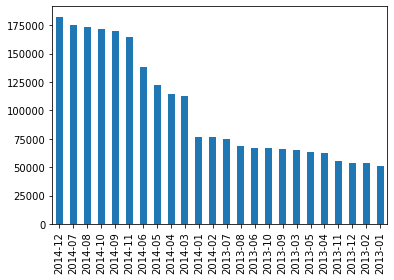

In [44]:
cnt_ym.plot.bar()

<AxesSubplot:>

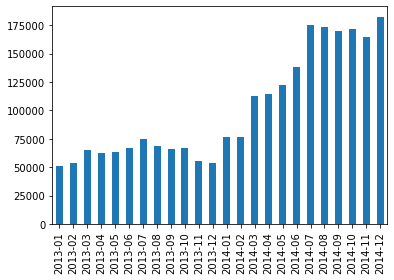

In [45]:
cnt_ym.sort_index().plot.bar()

### Q09. 몇 명의 사용자의 데이터가 본 데이터에 기록되어 있는가?

In [47]:
df["user_id"].nunique()

208944

### Q10. 두 번 이상 데이터가 기록된 사용자의 비율은 어떠한가?
※ 반올림하여 소수 둘 째 자리까지 표기하시오.  
(정답 예시: 0.12)

In [56]:
cnt_user = df["user_id"].value_counts()
cnt_user.head(2)

In [57]:
cnt_user.tail(2)

In [60]:
(cnt_user >= 2).sum()

168170

In [61]:
(cnt_user >= 2).sum() / len(cnt_user)

0.8048568037368864

In [55]:
(cnt_user >= 2).value_counts(normalize = True)

True     0.804857
False    0.195143
Name: user_id, dtype: float64

### Q11. 각 대륙에 소속된 국가의 개수를 확인하시오.
※ posa_continent 및 user_location_country 를 사용하여 분석하시오.    
※ .drop_duplicates() 메서드 활용 가능

In [135]:
df_sub = df[["posa_continent", "user_location_country"]]
df_sub = df_sub.drop_duplicates().reset_index(drop = True)
df_sub.head(2)

posa_continent  user_location_country
0               3                     66
1               4                    195

In [136]:
df_sub["posa_continent"].value_counts()

3    215
1    166
2    115
4     93
0     45
Name: posa_continent, dtype: int64

In [140]:
df_sub_cross = pd.crosstab(df_sub["user_location_country"],
                           df_sub["posa_continent"])
df_sub_cross.sum()

posa_continent
0     45
1    166
2    115
3    215
4     93
dtype: int64

In [66]:
df["hotel_continent"].unique()

array([2, 0, 3, 6, 4, 5, 1], dtype=int64)

### Q12. 모바일 검색 데이터는 전체 데이터의 몇 %인가?

In [67]:
df["is_mobile"].value_counts(normalize = True)

0    0.873827
1    0.126173
Name: is_mobile, dtype: float64

### Q13. 모바일 검색이 아닌 경우는 PC로 검색했다고 가정했을 때 모바일과 PC모두를 사용하여 접속한 사람은 몇 명인가?

In [68]:
# is_mobile의 값이 0도 있고 1도 있는 사람은 몇 명?

In [80]:
df.loc[df["user_id"] == df["user_id"].unique()[150], ["user_id", "is_mobile"]]

user_id  is_mobile
510    38471          0
511    38471          0
512    38471          1

In [83]:
df_user_hy = df.groupby("user_id")["is_mobile"].nunique()
df_user_hy.head()

user_id
1     1
2     1
6     2
10    1
12    1
Name: is_mobile, dtype: int64

In [85]:
df.loc[df["user_id"] == 2, ["user_id", "is_mobile"]]

user_id  is_mobile
929867         2          0
1371007        2          0
1385955        2          0
1547934        2          0
1732635        2          0
1805272        2          0
2223207        2          0
2301341        2          0

In [86]:
(df_user_hy == 2).sum()

34387

### Q14. 모바일 검색여부에 따른 예약 비율을 확인하시오.
※ pandas의 crosstab() 함수를 사용하시오.

In [97]:
pd.crosstab(df["is_mobile"], df["is_booking"],
            normalize = 0) # 0, 1

is_booking         0         1
is_mobile                     
0           0.729799  0.270201
1           0.794588  0.205412

In [98]:
pd.crosstab(df["is_mobile"], df["is_booking"],
            normalize = 1)
# 예약 여부에 따른 모바일 검색비율

is_booking         0         1
is_mobile                     
0           0.864148  0.901089
1           0.135852  0.098911

### Q15. 패키지 여부에 따른 예약 비율을 확인하시오.

In [99]:
pd.crosstab(df["is_package"], df["is_booking"],
            normalize = 0)

is_booking         0         1
is_package                    
0           0.708840  0.291160
1           0.840161  0.159839

### Q16. 유입 채널별 검색 비율을 확인하시오.
※ 10번 채널의 검색 비율은 0.000195 이다.

In [100]:
df["channel"].value_counts(normalize = True)

9     0.562398
0     0.119344
1     0.099482
2     0.076347
5     0.064339
3     0.041096
4     0.024759
7     0.007658
8     0.002975
6     0.001407
10    0.000195
Name: channel, dtype: float64

### Q17. 유입 채널별 예약 비율을 확인하시오.

In [102]:
pd.crosstab(df["channel"], df["is_booking"],
            normalize = 0).round(2)

is_booking     0     1
channel               
0           0.75  0.25
1           0.77  0.23
2           0.79  0.21
3           0.80  0.20
4           0.62  0.38
5           0.70  0.30
6           0.82  0.18
7           0.85  0.15
8           0.74  0.26
9           0.73  0.27
10          0.80  0.20

### Q18. 체크인 일자와 체크아웃 일자를 활용해서 몇 박 예약을 하는지 확인할 수 있는 night 변수를 생성하고 해당 변수의 최대값을 확인하시오.
※ srch_ci 및 srch_co 변수를 사용하여 분석하시오.  
※ 대상변수의 결측치는 모두 "1900-01-01" 로 치환하여 분석하시오.  
※ timedelta 객체에서 일(day) 데이터를 추출하려면 .dt.days 어트리뷰트를 사용한다.

In [104]:
# df["srch_ci"].dtype
df["srch_ci"] = df["srch_ci"].fillna("1900-01-01")
df["srch_co"] = df["srch_co"].fillna("1900-01-01")
df["srch_ci"] = pd.to_datetime(df["srch_ci"])
df["srch_co"] = pd.to_datetime(df["srch_co"])
df["night"] = df["srch_co"] - df["srch_ci"]
df.head(2)

date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 08:22:12          2               3                     66   
1 2014-02-27 18:01:32          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   318               52078                        NaN   

   user_id  is_mobile  is_package  ...  srch_destination_id  \
0       12          0           1  ...                 8250   
1      756          0           1  ...                 8291   

  srch_destination_type_id is_booking  cnt  hotel_continent  hotel_country  \
0                        1          1    1                2             50   
1                        1          1    1                2             50   

   hotel_market  hotel_cluster   yyyymm  night  
0           628              1  2014-08 4 days  
1           191              2  2014-02 2 days  

[2 rows x 26 columns]

In [105]:
df["night"] = df["night"].dt.days
df.head(3)

date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 08:22:12          2               3                     66   
1 2014-02-27 18:01:32          2               3                     66   
2 2013-06-15 15:38:05         30               4                    195   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   318               52078                        NaN   
2                   548               56440                        NaN   

   user_id  is_mobile  is_package  ...  srch_destination_id  \
0       12          0           1  ...                 8250   
1      756          0           1  ...                 8291   
2     1048          0           1  ...                 1385   

  srch_destination_type_id is_booking  cnt  hotel_continent  hotel_country  \
0                        1          1    1                2             50   
1                        1          1    1                2             50   
2                        1          1    1                0            185   

   hotel_market  hotel_cluster   yyyymm  night  
0           628              1  2014-08      4  
1           191              2  2014-02      2  
2           185             58  2013-06      8  

[3 rows x 26 columns]

In [106]:
df["night"].max()

366

<AxesSubplot:ylabel='Frequency'>

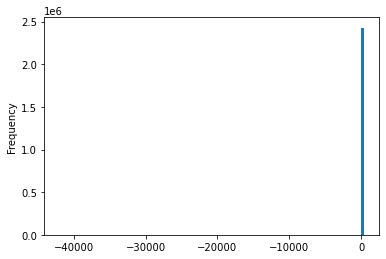

In [107]:
df["night"].plot.hist(bins = 100)

In [109]:
df_night_sub = df.loc[df["night"] < 0, ["srch_ci", "srch_co", "night"]]
df_night_sub = df_night_sub.sort_values("night")
df_night_sub.head(3)

srch_ci    srch_co  night
1164973 2014-12-18 1900-01-01 -41989
1977470 2014-11-30 2014-01-12   -322
1732359 2015-12-02 2015-01-14   -322

In [110]:
len(df_night_sub)

31

In [112]:
df_night_sub["night"].value_counts().head()

-184    2
-322    2
-47     2
-56     2
-58     2
Name: night, dtype: int64

### Q19. 18번에서 생성한 night 변수와 orig_destination_distance 변수간 상관분석을 실시하고 그 결과를 확인하시오.
※ Pearson 상관분석을 실시하시오.  
※ scipy 라이브러리의 pearsonr() 함수를 사용하시오.  
※ 결측치는 제거하고 분석하시오.  

In [113]:
from scipy.stats import pearsonr

In [114]:
df_sub = df[["night", "orig_destination_distance"]].dropna()
df_sub.head(2)

night  orig_destination_distance
0      4                  2234.2641
4      5                  2454.8588

In [116]:
pearsonr(df_sub["night"], df_sub["orig_destination_distance"])
# 상관계수는 0.0187, p-value는 매우작음.

(0.01874142739783663, 3.5859051807220325e-122)

### Q20. 검색 시점과 체크인 날짜간 차이를 계산하여 left_days 변수를 생성하시오.
※ 2014-08-11 08:22:12 와 2014-08-29의 차이는 17일이다.  
※ timedelta 객체에서 일(day) 데이터를 추출하려면 .dt.days 어트리뷰트를 사용한다.

In [122]:
# df.info()
df["left_days"] = df["srch_ci"] - df["date_time"]
df.loc[:2, ["date_time", "srch_ci", "left_days"]]

date_time    srch_ci        left_days
0 2014-08-11 08:22:12 2014-08-29 17 days 15:37:48
1 2014-02-27 18:01:32 2014-04-18 49 days 05:58:28
2 2013-06-15 15:38:05 2013-09-06 82 days 08:21:55

In [123]:
df["left_days"] = df["left_days"].dt.days
df.loc[:2, ["date_time", "srch_ci", "left_days"]]

date_time    srch_ci  left_days
0 2014-08-11 08:22:12 2014-08-29         17
1 2014-02-27 18:01:32 2014-04-18         49
2 2013-06-15 15:38:05 2013-09-06         82

In [124]:
df_sub = df.loc[df["left_days"] < 0, ["date_time", "srch_ci", "left_days"]]
df_sub.head(3)

date_time    srch_ci  left_days
17 2014-04-19 09:44:32 2014-04-19         -1
21 2014-05-07 14:27:45 2014-05-07         -1
22 2014-05-10 10:17:00 2014-05-10         -1

In [125]:
df_sub["left_days"].value_counts()

-1        92247
-2          341
-3           21
-41450       19
-41293       17
          ...  
-41746        1
-76           1
-41964        1
-245          1
-41635        1
Name: left_days, Length: 682, dtype: int64

<AxesSubplot:ylabel='Frequency'>

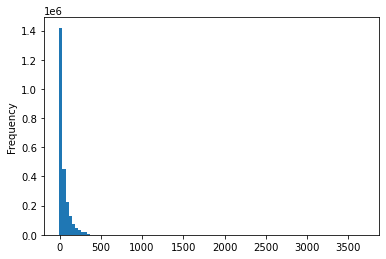

In [128]:
df_sub_m1GE = df.loc[df["left_days"] >= -1, ]
df_sub_m1GE["left_days"].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

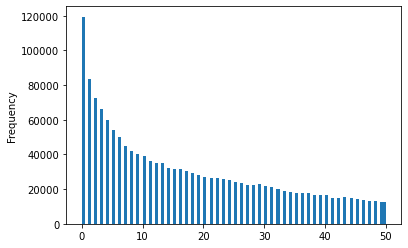

In [130]:
df_sub_2 = df.loc[(df["left_days"] >= 0) & (df["left_days"] <= 50), ]
df_sub_2["left_days"].plot.hist(bins = 100)

### Q21. night 변수와 left_days 변수간 상관분석을 실시하고 그 결과를 확인하시오.
※ Pearson's 상관분석을 실시하시오.

In [131]:
pearsonr(df["night"], df["left_days"])

(0.005002405050663138, 6.394887065241212e-15)

In [132]:
df_sub = df.loc[(df["night"] > 0) & (df["left_days"] >= -1), ]
pearsonr(df_sub["night"], df_sub["left_days"])

(0.25789867922421733, 0.0)

### Q22. 국내 여행이라고 판단할 수 있는 검색건수는 총 몇 건인가?
※ user_location_country 와 hotel_country 변수를 사용하여 분석하시오.  
※ 두 변수의 값이 같으면 국내 여행으로 간주한다.

In [133]:
sum(df["user_location_country"] == df["hotel_country"])

3279

### Q23. 한 번에 가장 많은 사람이 체크인 한다고 판단되는 검색건의 사람 수는 몇 명인가?
※ srch_adults_cnt 변수와 srch_children_cnt 변수를 사용하여 분석하시오.

In [141]:
df["srch_total_cnt"] = df["srch_adults_cnt"] + df["srch_children_cnt"]
df["srch_total_cnt"].max()

18

<AxesSubplot:>

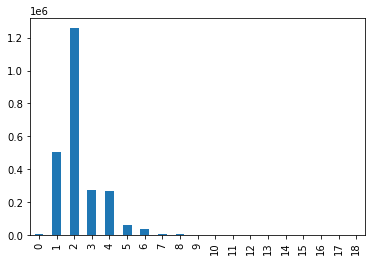

In [146]:
# df["srch_total_cnt"].plot.hist(bins = 15)
df["srch_total_cnt"].value_counts().sort_index().plot.bar()

### Q24. 가장 검색 빈도가 높은 성인과 아동의 조합은 무엇인가?
※ srch_adults_cnt 변수와 srch_children_cnt 변수를 사용하여 분석하시오.  
(정답 예시: 성인: 1, 아동: 2)

In [147]:
pd.crosstab(df["srch_adults_cnt"], df["srch_children_cnt"])

srch_children_cnt        0       1       2      3     4    5    6   7   8   9
srch_adults_cnt                                                              
0                     4124      94      41      0     0    0    0   0   0   0
1                   503276   56289   12869   2560   408   93  109  29  59  21
2                  1202713  169970  144951  19898  4438  320  197  11  32   1
3                    90388   26871    9895   3063   690  148   50   8  16   8
4                    94844   16288   11461   2327  2303  266  148  39   9   3
5                    12843    2519    1193    508   172   90   20   4   0   5
6                    16150    1824    1466    577   410  176  281  28   9   6
7                     1773     368     198    129    40   50   12   1   1   1
8                     4243     510     316    122   175   55   50  29  30   4
9                      669      93      82     38    21   22   17  14   5   3

<AxesSubplot:xlabel='srch_children_cnt', ylabel='srch_adults_cnt'>

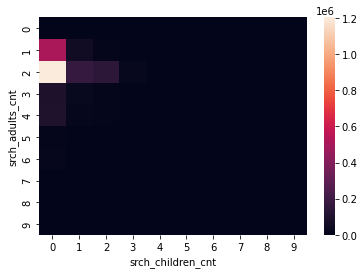

In [149]:
import seaborn as sns
sns.heatmap(pd.crosstab(df["srch_adults_cnt"], df["srch_children_cnt"]))

### Q25. 인기가 많은 국가를 구분할 수 있는가?
※ 주어진 데이터를 활용하여 자유롭게 분석해보시오.

### Q26. 인기가 많은 호텔을 구분할 수 있는가?
※ 주어진 데이터를 활용하여 자유롭게 분석해보시오.